<center><img src="https://github.com/kendallsmith24/KendallSmith2.github.io/blob/main/images/moviereel.jpg?raw=true" style="width:800px;height:400px;"></center>

# <font color="black"><center>Movie Correlation/Analysis Project</center></font>

## Table of Contents

### 1. Importing Libraries and Dataset/Observing the Dataframe
### 2. Cleaning/Modifying the Dataset
-  2a. Removing Nulls/Changing Data Types
-  2b. Correcting Disparities in the 'released' and 'year' columns

### 3. Correlation

### 4. Additional Exploratory Analysis

## 1. Importing Libraries and Dataset/Observing the Dataframe

In [1]:
# PROJECT DATASET FOUND AT https://www.kaggle.com/danielgrijalvas/movies

# IMPORT LIBRARIES

import pandas as pd
pd.options.mode.chained_assignment = None
# ADDING 'pd.options.mode.chained_assignment = None' REMOVES THE 'SettingWithCopyWarning' THAT WILL 
# SHOW WHEN RUNNING CODE LATER ON IN THE PROJECT

import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# ADJUSTS THE CONFIGURATION OF THE PLOTS

# IMPORT THE DATA

df=pd.read_csv(r'C:\Users\jksmi\Downloads\movies.csv')

In [2]:
# NOW THE CHECK THE DATAFRAME

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


## 2. Cleaning/Modifying the Dataset

## 2a. Removing Nulls/Changing Data Types

In [3]:
# CHECKING TO FIND IF THERE IS ANY MISSING DATA (**NOTICE NAN VALUES IN THE Budget and Gross columns)
# LOOP THROUGH DATAFRAME TO FIND PERCENTAGE OF MISSING DATA WITHIN THE COLUMNS

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# DROPPING ROWS IN THE DATAFRAME WITH MISSING (NAN) VALUES AND CREATING NEW DATAFRAME TITLED 'moviesdf' WITH IT
moviesdf = df.dropna()

In [5]:
# NOW TO CHECK THE NEWLY CREATED 'moviesdf' DATAFRAME AND TO CHECK FOR MISSING DATA
moviesdf

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [6]:
for col in moviesdf.columns:
    pct_missing = np.mean(moviesdf[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
# NOW TO CHECK THE DATA TYPES OF THE DATAFRAME COLUMNS
moviesdf.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# CHANGING THE DATA TYPE OF COLUMNS TO A DIFFERENT DATA TYPE
# NOW TO CHANGE THE DATA TYPE OF THE budget AND gross COLUMNS FROM float64 to int64

moviesdf['budget'] = moviesdf['budget'].astype('int64')

moviesdf['gross'] = moviesdf['gross'].astype('int64')

In [9]:
# NOW TO CHECK TO SEE IF THE DATA TYPE CHANGE WAS SUCCESSFUL

moviesdf.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
# NOW TO CHECK THE HEAD ROWS OF THE DATAFRAME TO OBSERVE THE CHANGE IN THE DATAFRAME

moviesdf.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


## 2b. Correcting Disparities in the 'released' and 'year' columns

In [11]:
# CREATING 2 NEW COLUMNS TO THE DATAFRAME FOR THE 'year' AND 'released' COLUMNS AS THE YEAR DOES NOT MATCH
# FOR ALL OF THE ROWS IN THE DATAFRAME (EXAMPLE SHOWN BELOW WHERE IN THE 8TH ROW OF THE DATAFRAME, NOTICE THAT THE YEAR
# SHOWS '1980' AND THE RELEASED YEAR SHOWS '1981'.)

moviesdf.iloc[8]

name                          Superman II
rating                                 PG
genre                              Action
year                                 1980
released    June 19, 1981 (United States)
score                                 6.8
votes                            101000.0
director                   Richard Lester
writer                       Jerry Siegel
star                         Gene Hackman
country                     United States
budget                           54000000
gross                           108185706
company                    Dovemead Films
runtime                             127.0
Name: 8, dtype: object

In [12]:
# ADDING 'pd.options.mode.chained_assignment = None' REMOVED THE 'SettingWithCopyWarning' 
#THAT WILL SHOW WHEN RUNNING BELOW CODE

# THE 2 NEW COLUMNS WILL BE 'releasedate' AND 'yearcorrect'; THE 'releasedate' COLUMN WILL BE THE SAME AS THE
# 'released' COLUMN (EXCLUDING THE RELEASED COUNTRY) AND THE 'yearcorrect' COLUMN WILL ONLY SHOW THE MOVIE 
# RELEASE YEAR (AS TAKEN FROM THE 'releasedate' COLUMN)

# CREATING 'releasedate' COLUMN

moviesdf['releasedate'] = moviesdf['released'].astype(str).str[:-15]

In [13]:
# CREATING 'yearcorrect' COLUMN FROM 'releasedate' COLUMN

moviesdf['yearcorrect'] = moviesdf['releasedate'].astype(str).str[-5:]

In [14]:
# CHECKING DATAFRAME TO SEE IF COLUMNS HAVE SUCCESSFULLY CREATED WITH CORRECT VALUES

moviesdf

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2020",2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14, 2020",2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2020",2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21, 2020",2020


In [15]:
# SECONDARY CHECK USING THE 8TH ROW IN THE DATAFRAME FROM BEFORE

moviesdf.iloc[8]

name                             Superman II
rating                                    PG
genre                                 Action
year                                    1980
released       June 19, 1981 (United States)
score                                    6.8
votes                               101000.0
director                      Richard Lester
writer                          Jerry Siegel
star                            Gene Hackman
country                        United States
budget                              54000000
gross                              108185706
company                       Dovemead Films
runtime                                127.0
releasedate                   June 19, 1981 
yearcorrect                            1981 
Name: 8, dtype: object

In [16]:
# NEWLY CREATED COLUMNS 'releasedate' AND 'yearcorrect' BOTH SHOW 1981 AS ORIGINAL RELEASED COLUMN

In [17]:
# CHECK THE DATA TYPES FOR THE DATAFRAME AFTER ADDING THE NEW COLUMNS

moviesdf.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
releasedate     object
yearcorrect     object
dtype: object

## 3. Correlation

In [18]:
# HYPOTHESIS 1:
# 'Budget will have a high correlation with gross revenue.'

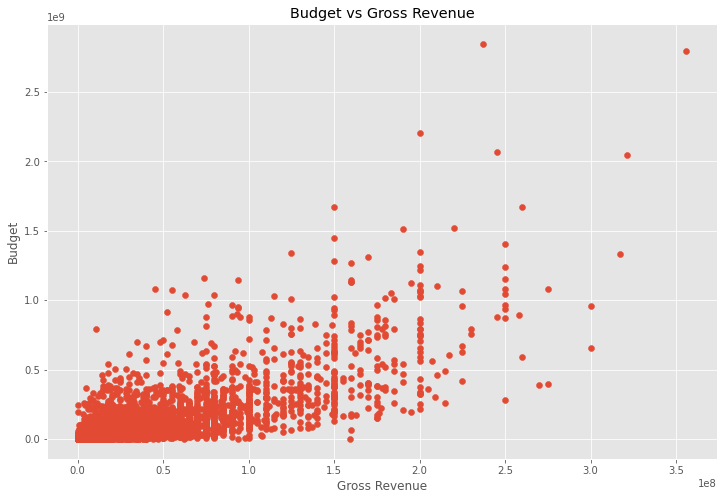

In [19]:
# BUILD A SCATTER PLOT WITH BUDGET VS GROSS TO DETERMINE CORRELATION

plt.scatter(x=moviesdf['budget'], y=moviesdf['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

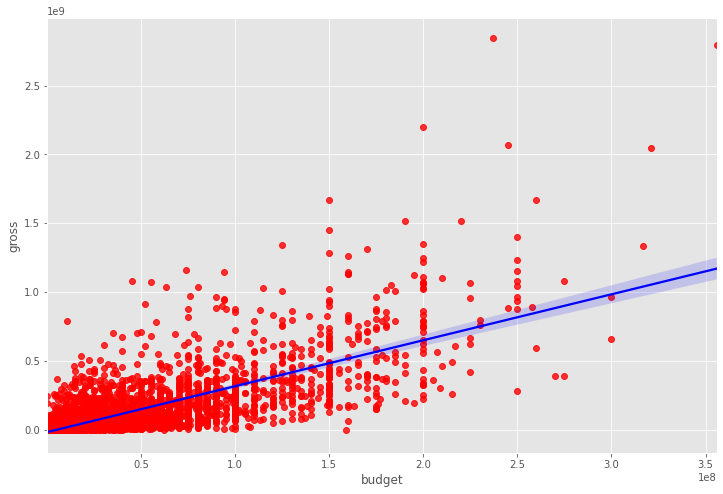

In [20]:
# BUILD A REGRESSION PLOT WITH THE BUDGET VS GROSS USING SEABORN

sns.regplot(x='budget', y='gross', data=moviesdf, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [21]:
# HYPOTHESIS 2:
# 'Votes will have a high correlation with gross revenue.'

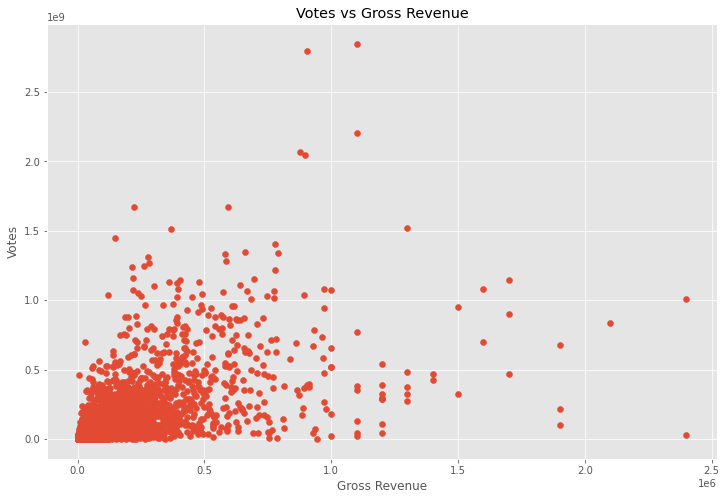

In [22]:
# BUILD A SCATTER PLOT WITH VOTES VS GROSS TO DETERMINE CORRELATION

plt.scatter(x=moviesdf['votes'], y=moviesdf['gross'])

plt.title('Votes vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Votes')
plt.show()

<AxesSubplot:xlabel='votes', ylabel='gross'>

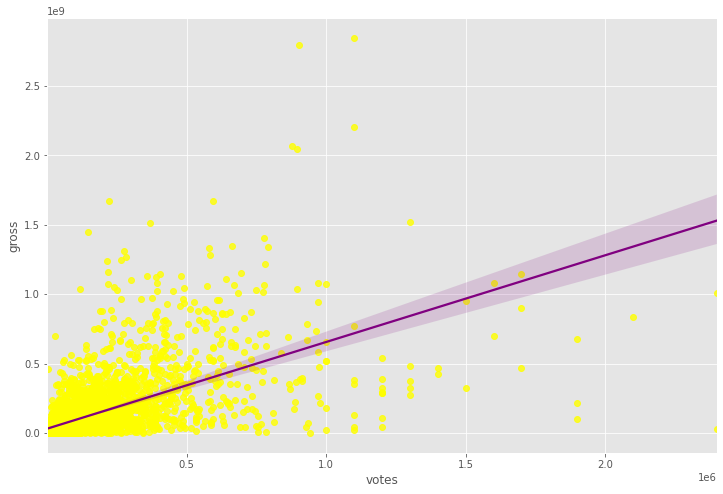

In [23]:
# BUILDING A REGRESSION PLOT WITH THE VOTES VS GROSS REVENUE USING SEABORN

sns.regplot(x='votes', y='gross', data=moviesdf, scatter_kws={"color":"yellow"}, line_kws={"color":"purple"})

In [24]:
# LOOKING AT CORRELATION
# DIFFERENT TYPES OF CORRELEATION ('Pearson', 'Kendall', 'Spearman'); Pearson (used below) IS DEFAULT

moviesdf.corr() 

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [25]:
# LOOKING AT CORRELATION(Kendall)

moviesdf.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [26]:
# LOOKING AT CORRELATION(Spearman)

moviesdf.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [27]:
# BOTH REGRESSION AND SCATTER PLOTS CONFIRM HIGH CORRELATION BETWEEN BUDGET AND VOTES WITH GROSS REVENUE

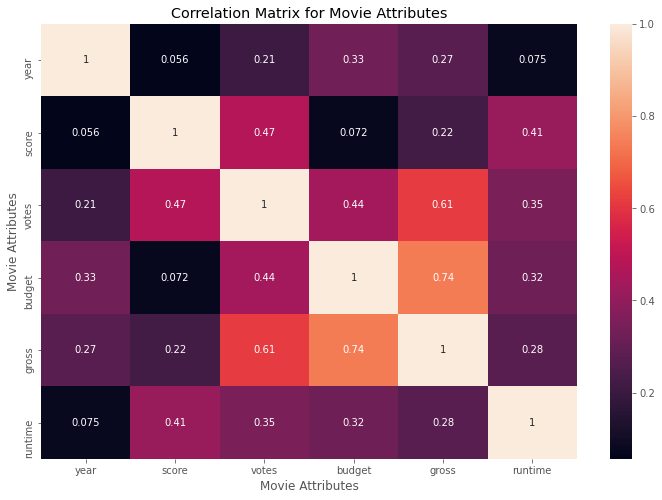

In [28]:
# CREATE A HEATMAP TO DISPLAY CORRELATION

correlation_matrix = moviesdf.corr('pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie Attributes')
plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')

plt.show()

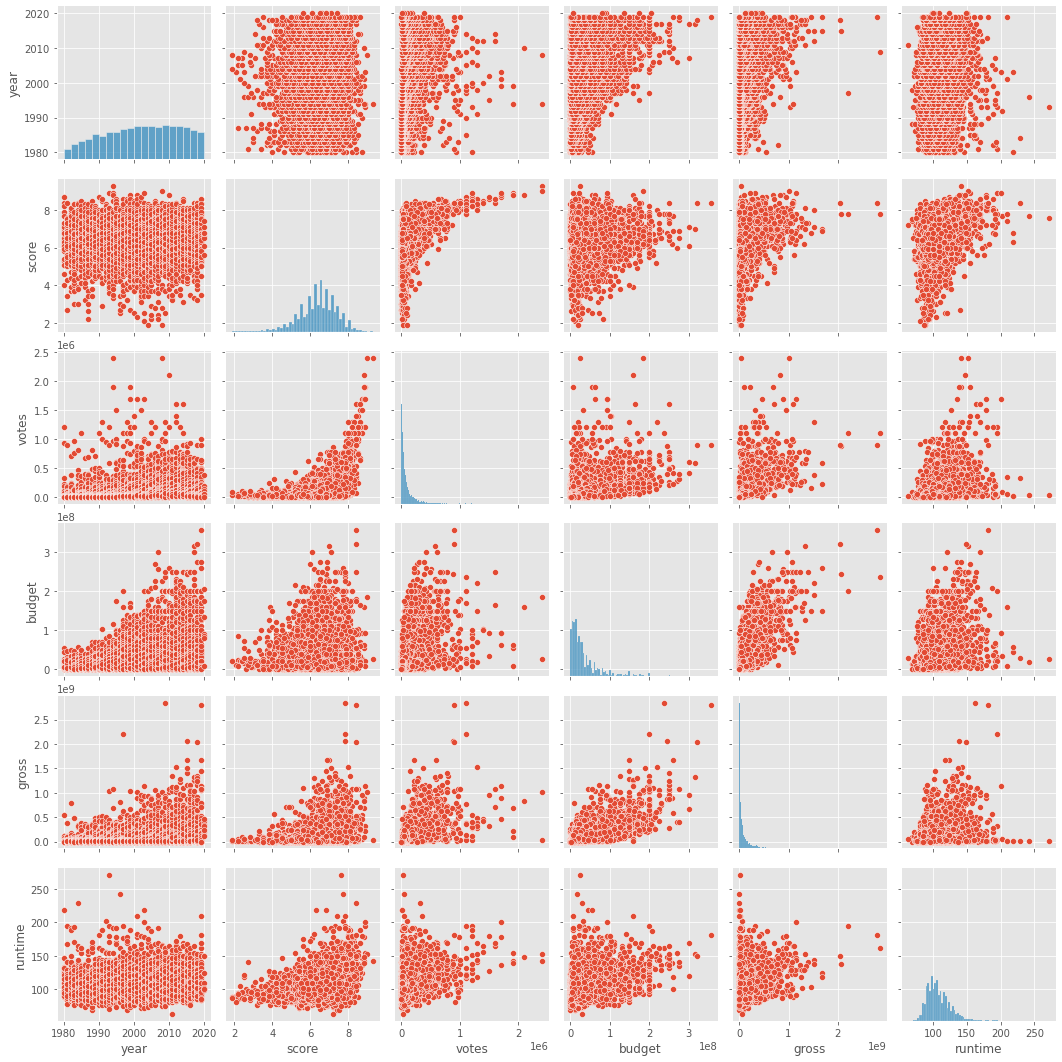

In [29]:
# CREATING PAIRPLOT TO SHOW RELATIONSHIPS BETWEEN MOVIE ATTRIBUTES

sns.pairplot(moviesdf)

In [30]:
# AGAIN HEATMAP AND PAIRPLOT CONFIRM HIGH CORRELATION BETWEEN BUDGET AND VOTES WITH GROSS REVENUE

## 4. Additional Exploratory Analysis

In [31]:
# NOW TO DO SOME ADDITIONAL EXPLORATORY DATA ANALYSIS WITH THE DATAFRAME, UTILIZING DIFFERENT METHODS
# TO GATHER DIFFERENT COLLECTIONS OF INFORMATION FROM THE DATASET

In [32]:
# TAKE A LOOK BACK AT THE DIFFERENT COLUMNS IN DATAFRAME ALONG WITH THEIR DATA TYPES
moviesdf.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
releasedate     object
yearcorrect     object
dtype: object

In [33]:
moviesdf.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [34]:
# BUDGET (AVG, MIN, MAX) BY GENRE
# GROSS REVENUE (AVG, MIN, MAX) BY GENRE
# RUNTIME (AVG, MIN, MAX) BY GENRE
# SCORE (AVG, MIN, MAX) BY GENRE

In [35]:
pd.set_option('display.max_rows',100)

In [36]:
# CHECKING THE AVERAGE, MINIMUM, MAXIMUM, TOTAL BUDGET AND GROSS REVENUES OF MOVIES BY GENRE

pd.pivot_table(data=moviesdf, index=['genre'], values=['budget','gross'],aggfunc=['mean','min','max','sum'])

mean                     min                 max  \
                 budget         gross    budget    gross     budget   
genre                                                                 
Action     5.846856e+07  1.680232e+08      7000     2970  356000000   
Adventure  4.595890e+07  1.332682e+08    500000    67878  250000000   
Animation  7.632336e+07  2.811044e+08     70000    30379  260000000   
Biography  2.544167e+07  6.139527e+07    111000    46362  159000000   
Comedy     2.280237e+07  5.916766e+07     22769      309  175000000   
Crime      2.260290e+07  5.016958e+07      6000    11710  110000000   
Drama      2.324188e+07  6.036914e+07      7000     2554  200000000   
Family     5.112500e+07  5.185831e+08  10500000  2119994  160000000   
Fantasy    1.722439e+07  3.987870e+07   1000000    32118  100000000   
Horror     1.343453e+07  5.681695e+07     15000     2270   97000000   
Mystery    3.187647e+07  1.178877e+08   6900000   133645  125000000   
Romance    2.404000e+07  3.357538e+07  10000000   299792   50200000   
Sci-Fi     2.441667e+07  3.761010e+07   1500000  3792188   80000000   
Thriller   1.274286e+07  4.248814e+07   4000000   459824   26000000   
Western    1.050000e+07  1.001294e+07  10000000  1736123   11000000   

                               sum                
                gross       budget         gross  
genre                                             
Action     2847246203  82733013068  237752868767  
Adventure  1342321665  15028560000   43578711908  
Animation  1670727580  21141570000   77865909110  
Biography   911902649   7912358768   19093930296  
Comedy      611257819  34112348215   88514817620  
Crime      1074427370   9018556080   20017662162  
Drama      2201647264  20057739987   52098564769  
Family     1264434525    204500000    2074332587  
Fantasy     206071502    706200000    1635026609  
Horror      701796444   3372067000   14261055032  
Mystery     760006945    541900001    2004091467  
Romance     127869379    120200000     167876905  
Sci-Fi      161849455    146500000     225660614  
Thriller     96258201     89200000     297416988  
Western      18289763     21000000      20025886

In [37]:
# CHECKING THE AVERAGE, MAXIMUM, MINIMUM, TOTAL BUDGET AND GROSS REVENUES OF MOVIES RELEASED EACH YEAR BY GENRE

moviesdf.groupby(['genre','year'])[['budget','gross']].agg(['mean','min','max','sum'])

budget                                        gross  \
                       mean       min       max        sum          mean   
genre    year                                                              
Action   1980  1.790909e+07   3500000  54000000  197000000  8.486993e+07   
         1981  1.357692e+07   2000000  28000000  176500000  5.278621e+07   
         1982  1.184667e+07   2000000  28000000  177700000  3.708966e+07   
         1983  1.537176e+07    457000  47000000  322807000  4.870578e+07   
         1984  1.571957e+07   1500000  40000000  361550000  6.938428e+07   
...                     ...       ...       ...        ...           ...   
Thriller 2014  1.320000e+07  13200000  13200000   13200000  5.432321e+07   
         2015  4.000000e+06   4000000   4000000    4000000  5.242586e+07   
         2019  8.000000e+06   8000000   8000000    8000000  3.659936e+07   
Western  1982  1.100000e+07  11000000  11000000   11000000  1.736123e+06   
         1993  1.000000e+07  10000000  10000000   10000000  1.828976e+07   

                                                
                    min        max         sum  
genre    year                                   
Action   1980   3763988  538375067   933569203  
         1981   1791147  389925971   686220711  
         1982   2666873  125212904   556344843  
         1983   1262691  475106177  1022821332  
         1984    129000  333107271  1595838432  
...                 ...        ...         ...  
Thriller 2014  54323210   54323210    54323210  
         2015  52425855   52425855    52425855  
         2019  36599361   36599361    36599361  
Western  1982   1736123    1736123     1736123  
         1993  18289763   18289763    18289763  

[382 rows x 8 columns]

In [38]:
# CHECKING THE AVERAGE, MINIMUM, AND MAXIMUM RUNTIME OF MOVIES BY GENRE

pd.pivot_table(data=moviesdf, index=['genre'], values=['runtime'],aggfunc=['mean','min','max'])

,mean,min,max
,runtime,runtime,runtime
genre,,,
Action,111.197880,75.0,201.0
Adventure,109.107034,73.0,219.0
Animation,91.570397,63.0,126.0
Biography,121.874598,83.0,219.0
Comedy,102.108957,77.0,167.0
Crime,112.969925,69.0,229.0
Drama,115.117034,76.0,271.0
Family,109.750000,92.0,129.0


In [39]:
# CHECKING THE AVERAGE, MAXIMUM, MINUMUM RUNTIME OF MOVIES EACH YEAR BY GENRE

moviesdf.groupby(['genre','year'])[['runtime']].agg(['mean','min','max'])

runtime              
                     mean    min    max
genre    year                          
Action   1980  116.090909   94.0  133.0
         1981  106.538462   90.0  127.0
         1982  106.000000   89.0  136.0
         1983  106.476190   80.0  134.0
         1984  107.608696   90.0  137.0
...                   ...    ...    ...
Thriller 2014   84.000000   84.0   84.0
         2015   91.000000   91.0   91.0
         2019  102.000000  102.0  102.0
Western  1982   90.000000   90.0   90.0
         1993  111.000000  111.0  111.0

[382 rows x 3 columns]

In [40]:
# CHECKING THE AVERAGE, MINIMUM, AND MAXIMUM SCORE OF MOVIES BY GENRE

pd.pivot_table(data=moviesdf, index=['genre'], values='score',aggfunc=['mean','min','max'])

,mean,min,max
,score,score,score
genre,,,
Action,6.247350,2.1,9.0
Adventure,6.268196,2.4,8.6
Animation,6.690614,3.3,8.6
Biography,7.088103,4.7,8.9
Comedy,6.190709,1.9,8.6
Crime,6.689223,3.4,8.9
Drama,6.721437,2.3,9.3
Family,6.675000,5.9,7.8


In [41]:
# CHECKING THE AVERAGE, MAXIMUM, MINIMUM SCORE OF MOVIES EACH YEAR BY GENRE

moviesdf.groupby(['genre','year'])[['score']].agg(['mean','min','max'])

score          
                   mean  min  max
genre    year                    
Action   1980  6.318182  4.6  8.7
         1981  6.607692  5.1  8.4
         1982  6.320000  3.7  8.1
         1983  6.047619  4.6  8.3
         1984  6.434783  4.4  8.0
...                 ...  ...  ...
Thriller 2014  5.600000  5.6  5.6
         2015  4.700000  4.7  4.7
         2019  5.600000  5.6  5.6
Western  1982  6.400000  6.4  6.4
         1993  5.500000  5.5  5.5

[382 rows x 3 columns]

In [42]:
# CHECKING THE NUMBER OF MOVIES RELEASED BY GENRE
# THIS CAN ALSO BE DONE WITH '.value_counts()' # moviesdf['genre'].value_counts()

pd.pivot_table(data=moviesdf, index=['genre'], values='released',aggfunc='count')

,released
genre,
Action,1415
Adventure,327
Animation,277
Biography,311
Comedy,1496
Crime,399
Drama,863
Family,4
Fantasy,41


<AxesSubplot:>

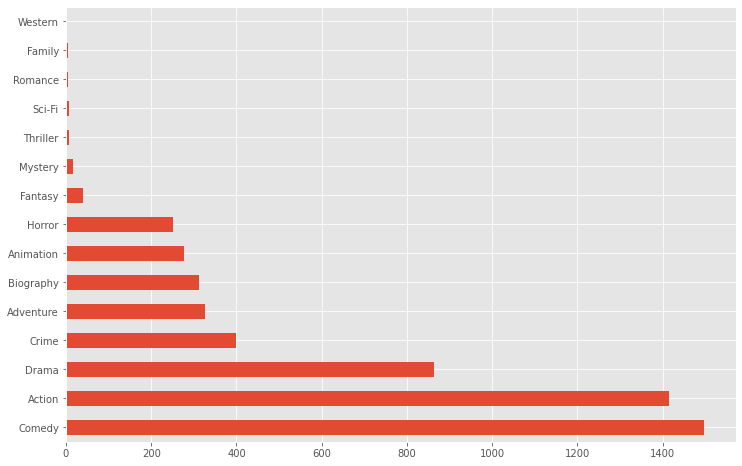

In [43]:
# VISUALIZING THE NUMBER OF MOVIES BY GENRE 

moviesdf['genre'].value_counts().plot(kind='barh')

In [44]:
# CHECKING THE NUMBER OF MOVIES RELEASED EACH YEAR BY GENRE

moviesdf.groupby(['genre','year'])[['released']].agg('count')

released
genre    year          
Action   1980        11
         1981        13
         1982        15
         1983        21
         1984        23
...                 ...
Thriller 2014         1
         2015         1
         2019         1
Western  1982         1
         1993         1

[382 rows x 1 columns]

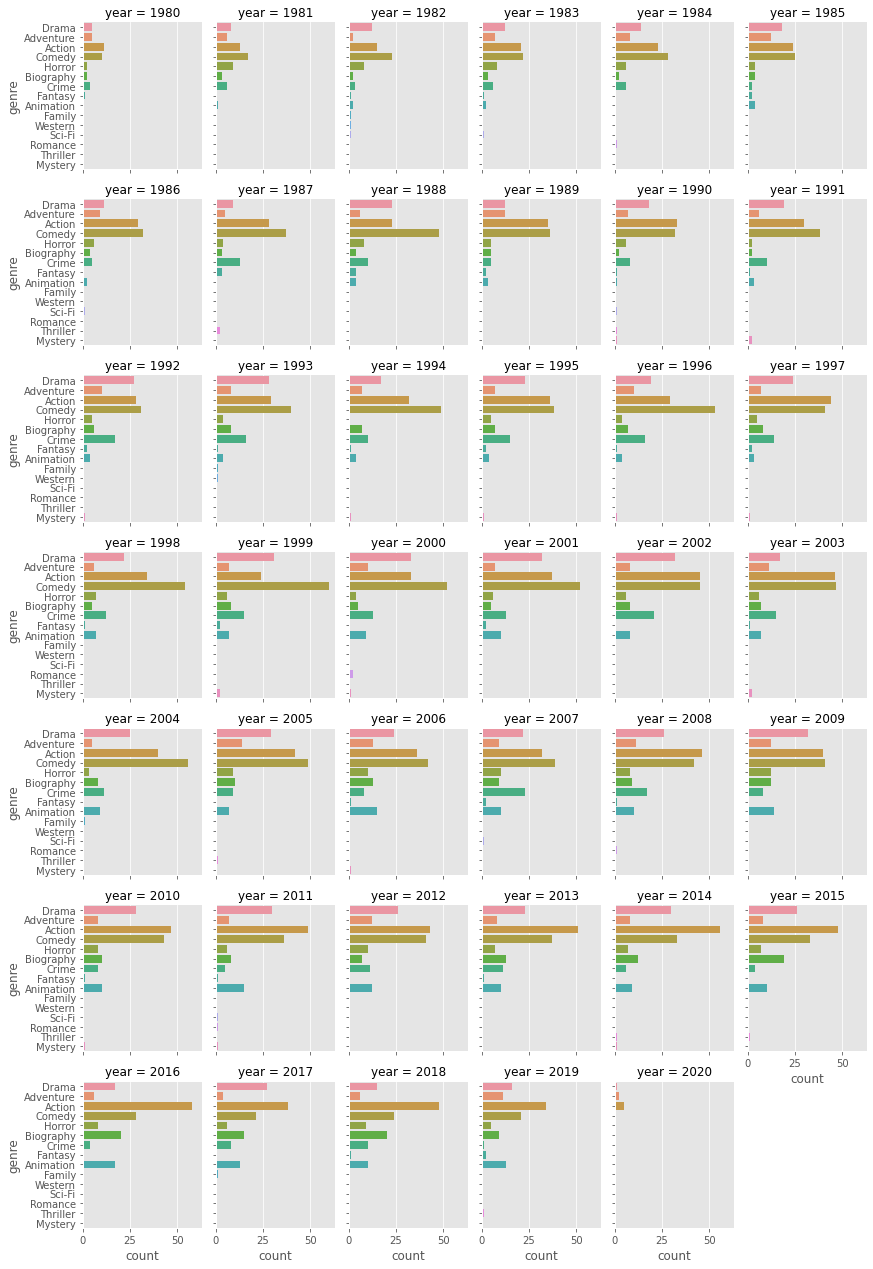

In [45]:
# VISUALIZING THE NUMBER OF MOVIES RELEASED EACH YEAR BY GENRE

sns.catplot(y='genre',col='year', col_wrap=6,data=moviesdf,kind='count',height=2.5,aspect=0.8)

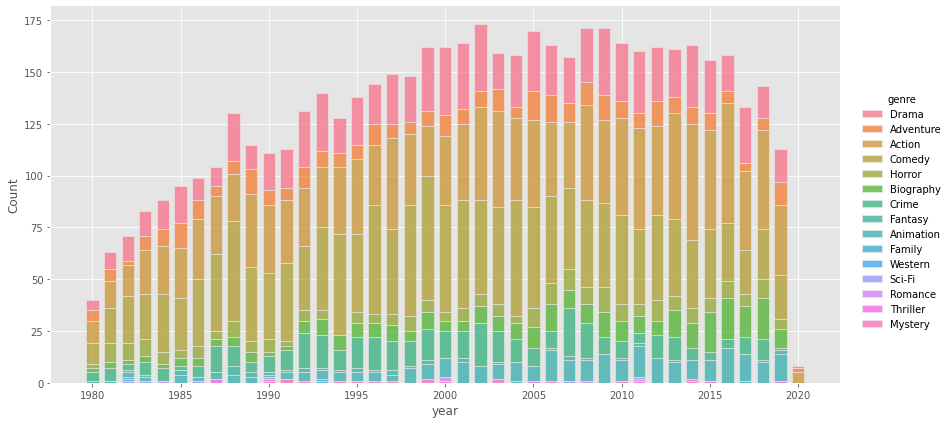

In [46]:
sns.displot(moviesdf,x='year', hue='genre', multiple='stack', height=6.0, aspect=2.0, shrink=0.7, discrete=True)

In [47]:
# NOW TO USE PANDAS QUERY AND FILTER METHODS TO PULL SPECIFIC INFORMATION FROM THE DATAFRAME

# FIRST, PULL ALL MOVIES WHERE THE BUDGET WAS GREATER THAN THE GROSS REVENUE

moviesdf.query('budget > gross')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,yearcorrect
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,"April 24, 1981",1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0,"April 24, 1981",1981
46,The Island,R,Action,1980,"June 13, 1980 (United States)",5.3,3900.0,Michael Ritchie,Peter Benchley,Michael Caine,United States,22000000,15716828,Universal Pictures,109.0,"June 13, 1980",1980
48,The Nude Bomb,PG,Action,1980,"May 9, 1980 (United States)",5.1,3100.0,Clive Donner,Mel Brooks,Don Adams,United States,15000000,14662035,Universal Pictures,94.0,"May 9, 1980",1980
51,Melvin and Howard,R,Comedy,1980,"September 19, 1980 (United States)",6.8,4500.0,Jonathan Demme,Bo Goldman,Paul Le Mat,United States,7000000,4309490,Universal Pictures,95.0,"September 19, 1980",1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,The Sun Is also a Star,PG-13,Drama,2019,"May 17, 2019 (United States)",5.9,6600.0,Ry Russo-Young,Tracy Oliver,Yara Shahidi,United States,9000000,6750029,Alloy Entertainment,100.0,"May 17, 2019",2019
7588,K-12,Not Rated,Fantasy,2019,"September 5, 2019 (United States)",6.5,2500.0,Melanie Martinez,Melanie Martinez,Melanie Martinez,United States,5000000,359377,Atlantic Records,96.0,"September 5, 2019",2019
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400.0,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83.0,May 19,ay 19
7616,High on the Hog,R,Action,2019,"April 16, 2019 (United States)",3.5,195.0,Tony Wash,Andy Golub,Sid Haig,United States,1200000,45696,Hicktown Entertainment,85.0,"April 16, 2019",2019


In [48]:
# NEXT, PULL ALL MOVIES WHERE BUDGET WAS GREATER THAN GROSS REVENUE, YEAR GREATER OR EQUAL TO 2010 AND SCORE LESS THAN 5
# USING THE PANDAS FILTER METHOD TO ONLY KEEP THE NAME, YEAR, BUDGET, GROSS REVENUE AND SCORE COLUMNS

moviesdf.query('(budget > gross) and (year >= 2010) and (score < 5)').filter(['name','year','budget','gross','score'])

,name,year,budget,gross,score
5708,Jonah Hex,2010,47000000,10903312,4.7
5821,Vanishing on 7th Street,2010,10000000,1671196,4.9
5830,My Soul to Take,2010,25000000,21500813,4.8
5840,Passion Play,2010,8000000,25603,4.6
5962,Bucky Larson: Born to Be a Star,2011,10000000,2530394,3.2
6140,LOL,2012,11000000,10578643,4.4
6147,About Cherry,2012,2500000,8315,4.8
6190,The Cold Light of Day,2012,20000000,16863583,4.9
6191,The Apparition,2012,17000000,11350665,4.1
6197,Lay the Favorite,2012,26350000,1577272,4.8


In [49]:
# PULL ALL ACTION MOVIES IN 1985 AND 2018 WHERE GROSS WAS GREATER THAN BUDGET
# SHOWING ONLY THE NAME, YEAR, BUDGET AND GROSS REVENUE COLUMNS

moviesdf.query('(gross > budget) and (year == [1985,2018]) and (genre == "Action")').filter(['name','year','budget','gross']).head(25)

,name,year,budget,gross
646,To Live and Die in L.A.,1985,6000000,17307019
650,Rambo: First Blood Part II,1985,44000000,300400432
659,Commando,1985,10000000,57491000
662,Silverado,1985,26000000,32192570
672,Mad Max Beyond Thunderdome,1985,10000000,36230219
674,A View to a Kill,1985,30000000,50327960
693,The Last Dragon,1985,10000000,25754284
702,The Jewel of the Nile,1985,25000000,96773200
734,Death Wish 3,1985,9000000,16116878
735,King Solomon's Mines,1985,12500000,15057465


In [50]:
# CREATING A FUNCTION THAT RETURNS A LIST OF ALL MOVIES WHERE GROSS REVENUE WAS GREATER THAN BUDGET BASED ON
# THE YEAR (y) ENTERED INTO IT (GENRE BEING AN OPTIONAL PARAMETER, g) -- NAMING THE FUNCTION 'movie_surplus'

def movie_surplus(y,*args):
    for g in args:
        return moviesdf.query('(budget < gross) and (year == @y) and (genre == @g)').filter(['name','year','budget','gross','genre'])
    else:
        return moviesdf.query('(budget < gross) and (year == @y)').filter(['name','year','budget','gross','genre'])
    

In [51]:
# TESTING THE 'movie_surplus' FUNCTION

movie_surplus(2008).head()

,name,year,budget,gross,genre
5243,The Dark Knight,2008,185000000,1005973645,Action
5244,Twilight,2008,37000000,408430415,Drama
5245,Iron Man,2008,140000000,585796247,Action
5246,The Incredible Hulk,2008,150000000,264770996,Action
5247,Kung Fu Panda,2008,130000000,631746197,Animation


In [52]:
# TESTING THE 'movie_surplus' FUNCITON (THIS TIME PASSING IN THE OPTIONAL GENRE PARAMETER AS 'Horror' AND 'Drama')

movie_surplus(2001,'Horror')

,name,year,budget,gross,genre
3873,The Others,2001,17000000,209947037,Horror
3885,Jeepers Creepers,2001,10000000,59371303,Horror
3916,From Hell,2001,35000000,74558115,Horror
3932,Session 9,2001,1500000,1612259,Horror
3964,Valentine,2001,29000000,36684136,Horror


In [53]:
movie_surplus(2001,'Drama').head()

,name,year,budget,gross,genre
3847,Mulholland Dr.,2001,15000000,20263646,Drama
3850,Donnie Darko,2001,6000000,6981586,Drama
3855,Black Hawk Down,2001,92000000,172989651,Drama
3862,A.I. Artificial Intelligence,2001,100000000,235926552,Drama
3869,Moulin Rouge!,2001,50000000,184935320,Drama


In [54]:
# CREATING A FUNCTION THAT RETURNS A LIST OF COMPANIES AND COUNT OF MOVIES RELEASED WHERE BUDGET 
# WAS GREATER THAN GROSS REVENUE BASED ON THE YEAR ENTERED INTO IT (GENRE BEING AN OPTIONAL PARAMETER, g)
# - NAMING THE FUNCTION 'movie_deficit'

def movie_deficit(y,*args):
    for g in args:
        return moviesdf.query('(budget > gross) and (year == @y) and (genre == @g)').groupby(['company'])[['released']].agg('count').reset_index()
    else:
        return moviesdf.query('(budget > gross) and (year == @y)').groupby(['company'])[['released']].agg('count').reset_index()

In [55]:
# TESTING THE 'movie_deficit' FUNCTION
# INPUT YEAR 2000 AND 'Action' AS THE GENRE

movie_deficit(2000,'Action')

,company,released
0,Brillstein-Grey Entertainment,1
1,Castle Rock Entertainment,2
2,Davis-Panzer Productions,1
3,Dimension Films,2
4,Morgan Creek Entertainment,2
5,New Line Cinema,1
6,Warner Bros.,2


In [56]:
# NOW TO CHECK TO SEE IF THE 'movie_deficit' FUNCTION OUTPUT IS CORRECT - CHECKING 'Morgan Creek Entertainment'

moviesdf.query('(budget > gross) and (year == 2000) and (genre == "Action") and (company == "Morgan Creek Entertainment")')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,yearcorrect
3725,Get Carter,R,Action,2000,"October 6, 2000 (United States)",5.2,33000.0,Stephen Kay,Ted Lewis,Sylvester Stallone,United States,63600000,19412993,Morgan Creek Entertainment,102.0,"October 6, 2000",2000
3769,The Art of War,R,Action,2000,"August 25, 2000 (United States)",5.7,29000.0,Christian Duguay,Wayne Beach,Wesley Snipes,United States,60000000,40400425,Morgan Creek Entertainment,117.0,"August 25, 2000",2000


In [57]:
# TESTING THE 'movie_deficit' FUNCTION
# INPUT YEAR 1998 AND 'Animation' AS THE GENRE

movie_deficit(1998,'Animation')

,company,released
0,Warner Bros.,1


In [58]:
# NOW TO CHECK TO SEE IF THE 'movie_deficit' FUNCTION OUTPUT IS CORRECT - CHECKING 'Warner Bros.'

moviesdf.query('(budget > gross) and (year == 1998) and (genre == "Animation") and (company == "Warner Bros.")')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,yearcorrect
3360,Quest for Camelot,G,Animation,1998,"May 15, 1998 (United States)",6.3,16000.0,Frederik Du Chau,Vera Chapman,Jessalyn Gilsig,United States,40000000,22510798,Warner Bros.,86.0,"May 15, 1998",1998


In [59]:
# TESTING THE 'movie_deficit' FUNCTION
# INPUT YEAR 1995, SORTED BY DESCENDING, ONLY RETURNING TOP 10 RESULTS

movie_deficit(1995).sort_values('released', ascending=False).head(10)

,company,released
26,Paramount Pictures,5
24,Miramax,4
36,TriStar Pictures,4
41,Warner Bros.,3
40,Universal Pictures,3
9,Castle Rock Entertainment,2
12,Columbia Pictures,2
23,Metro-Goldwyn-Mayer (MGM),2
35,Touchstone Pictures,2
34,The Zanuck Company,1


In [60]:
# NOW TO CHECK TO SEE IF THE 'movie_deficit' FUNCTION OUTPUT IS CORRECT - CHECKING 'TriStar Pictures'

moviesdf.query('(budget > gross) and (year == 1995) and (company == "TriStar Pictures")')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedate,yearcorrect
2675,The Quick and the Dead,R,Action,1995,"February 10, 1995 (United States)",6.4,88000.0,Sam Raimi,Simon Moore,Sharon Stone,United States,32000000,18636537,TriStar Pictures,107.0,"February 10, 1995",1995
2696,Johnny Mnemonic,R,Action,1995,"May 26, 1995 (United States)",5.7,68000.0,Robert Longo,William Gibson,Keanu Reeves,Canada,26000000,19075720,TriStar Pictures,96.0,"May 26, 1995",1995
2732,Devil in a Blue Dress,R,Crime,1995,"September 29, 1995 (United States)",6.7,18000.0,Carl Franklin,Walter Mosley,Denzel Washington,United States,27000000,16140822,TriStar Pictures,102.0,"September 29, 1995",1995
2750,Hideaway,R,Fantasy,1995,"March 3, 1995 (United States)",5.3,6400.0,Brett Leonard,Dean R. Koontz,Jeff Goldblum,United States,15000000,12201255,TriStar Pictures,106.0,"March 3, 1995",1995


In [61]:
# CREATE A DATAFRAME THAT CONTAINS THE GROSS AND BUDGET DIFFERENCE FOR EACH MOVIE IN THE 'moviesdf' DATASET

budget_difference = pd.DataFrame(moviesdf, columns=['name', 'year', 'company','budget', 'gross'])

In [62]:
budget_difference['movie_difference'] = budget_difference['gross'].sub(budget_difference['budget'], axis=0)

In [63]:
# CHECKING THE 'budget_difference' DATAFRAME

budget_difference

,name,year,company,budget,gross,movie_difference
0,The Shining,1980,Warner Bros.,19000000,46998772,27998772
1,The Blue Lagoon,1980,Columbia Pictures,4500000,58853106,54353106
2,Star Wars: Episode V - The Empire Strikes Back,1980,Lucasfilm,18000000,538375067,520375067
3,Airplane!,1980,Paramount Pictures,3500000,83453539,79953539
4,Caddyshack,1980,Orion Pictures,6000000,39846344,33846344
...,...,...,...,...,...,...
7648,Bad Boys for Life,2020,Columbia Pictures,90000000,426505244,336505244
7649,Sonic the Hedgehog,2020,Paramount Pictures,85000000,319715683,234715683
7650,Dolittle,2020,Universal Pictures,175000000,245487753,70487753
7651,The Call of the Wild,2020,20th Century Studios,135000000,111105497,-23894503


In [64]:
# EXPLORING THE 'budget_difference' DATAFRAME
# CHECKING FOR A LIST OF MOVIES WHERE 'movie_difference' WAS LESS THAN ZERO IN 2004

budget_difference.query('(movie_difference < 0) and (year==2004)').sort_values('movie_difference', ascending=True)

,name,year,company,budget,gross,movie_difference
4567,The Alamo,2004,Touchstone Pictures,107000000,25819961,-81180039
4617,The Big Bounce,2004,Shangri-La Entertainment,50000000,6808550,-43191450
4533,Around the World in 80 Days,2004,Walt Disney Pictures,110000000,72178895,-37821105
4517,The Perfect Score,2004,Paramount Pictures,40000000,10898337,-29101663
4581,Thunderbirds,2004,Working Title Films,57000000,28283637,-28716363
4592,Envy,2004,Dreamworks Pictures,40000000,14494036,-25505964
4593,Alfie,2004,Paramount Pictures,60000000,35060882,-24939118
4463,Spanglish,2004,Columbia Pictures,80000000,55470154,-24529846
4565,First Daughter,2004,New Regency Productions,30000000,10592180,-19407820
4521,Catwoman,2004,Warner Bros.,100000000,82102379,-17897621


In [65]:
# EXPLORING THE 'budget_difference' DATAFRAME
# CHECKING FOR A LIST OF MOVIES WHERE 'movie_difference' WAS BETWEEN $500,000 AND $1 MILLION IN 2010

budget_difference.query('(movie_difference < 1000000) and (movie_difference > 500000) and (year==2010)')

,name,year,company,budget,gross,movie_difference
5771,From Paris with Love,2010,EuropaCorp,52000000,52844496,844496


In [66]:
# EXPLORING BUDGET OVER TIME BY GENRE

genre_budget = moviesdf.groupby(['year','genre'])[['budget']].agg('sum').reset_index()
genre_budget

,year,genre,budget
0,1980,Action,197000000
1,1980,Adventure,79500000
2,1980,Biography,28000000
3,1980,Comedy,65000000
4,1980,Crime,31300000
...,...,...,...
377,2019,Horror,85000000
378,2019,Thriller,8000000
379,2020,Action,544500000
380,2020,Adventure,310000000


<AxesSubplot:xlabel='year', ylabel='budget'>

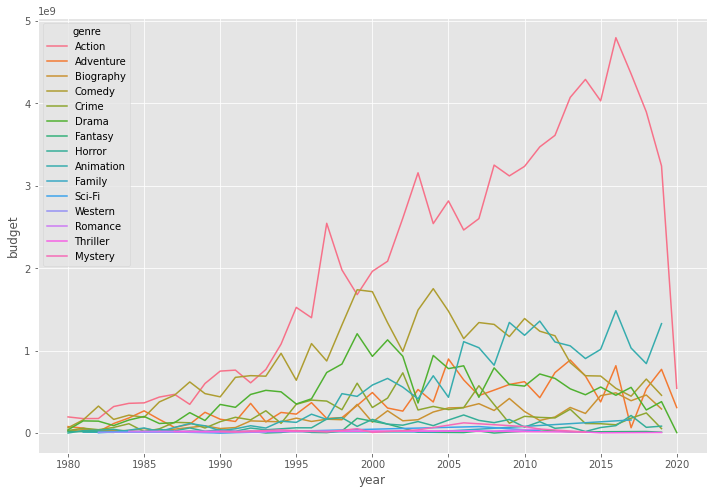

In [67]:
# NOW TO GRAPH BUDGET OVER TIME BY GENRE

sns.lineplot(data=genre_budget, x='year',y='budget', hue='genre')